In [1]:
!pip install cupy-cuda100 --user

In [2]:
import cupy as cp

## [High performance with <u><i><strong>CUDA</strong></i></u>](https://cupy.chainer.org/)
<u><i><strong>CuPy</strong></i></u> is an open-source matrix library accelerated with <u><i><strong>NVIDIA CUDA</strong></i></u>. <u><i><strong>CuPy</strong></i></u> provides GPU accelerated computing with Python. CuPy uses CUDA-related libraries including <u><i><strong>cuBLAS</strong></i></u>, <u><i><strong>cuDNN</strong></i></u>, <u><i><strong>cuRand</strong></i></u>, <u><i><strong>cuSolver</strong></i></u>, <u><i><strong>cuSPARSE</strong></i></u>, <u><i><strong>cuFFT</strong></i></u> and <u><i><strong>NCCL</strong></i></u> to make full use of the <u><i><strong>GPU</strong></i></u> architecture.
The figure shows <u><i><strong>CuPy</strong></i></u> speedup over NumPy. Most of them perform well on a <u><i><strong>GPU</strong></i></u> using CuPy out of the box. <u><i><strong>CuPy</strong></i></u> speeds up some operations more than 100X. You can read original benchmark article in [Single-<u><i><strong>GPU</strong></i></u> <u><i><strong>CuPy</strong></i></u> Speedups (RAPIDS AI)](https://medium.com/rapids-ai/single-gpu-cupy-speedups-ea99cbbb0cbb).

![CuPy speedup over NumPy](CuPy_Performance.png)

## [Highly compatible with <u><i><strong>NumPy</strong></i></u>](https://cupy.chainer.org/)
<u><i><strong>CuPy</strong></i></u>'s interface is highly compatible with <u><i><strong>NumPy</strong></i></u>; in most cases it can be used as a <strong><i><u>drop-in replacement</u></i></strong>. <i><u>All you need to do</u></i> is just <strong><i><u>replace numpy with cupy</u></i></strong> in your Python code. [Basics of <u><i><strong>CuPy</strong></i></u> (Tutorial)](https://docs-cupy.chainer.org/en/stable/tutorial/basic.html) is usefull to learn first step of <u><i><strong>CuPy</strong></i></u>.
<u><i><strong>CuPy</strong></i></u> supports various methods, indexing, data types, broadcasting and more. [Comparison Table (Reference Manual)](https://docs-cupy.chainer.org/en/stable/reference/comparison.html) shows a list of NumPy / <u><i><strong>SciPy</strong></i></u> APIs and its corresponding <u><i><strong>CuPy</strong></i></u> implementations.

In [3]:
x = cp.arange(6).reshape(2, 3).astype('f')
print("x =\n", x)
\
sum_result = x.sum(axis=1)
print("\nsum = ",sum_result)

x =
 [[0. 1. 2.]
 [3. 4. 5.]]

sum =  [ 3. 12.]


## [Easy to write a custom kernel](https://cupy.chainer.org/)
You can easily make a custom <u><i><strong>CUDA</strong></i></u> kernel if you want to make your code run faster, requiring only a small code snippet of <u><i><strong>C++</strong></i></u>. <u><i><strong>CuPy</strong></i></u> automatically wraps and compiles it to make a <u><i><strong>CUDA</strong></i></u> binary. Compiled binaries are cached and reused in subsequent runs. Please read [User-Defined Kernels (Tutorial)](https://docs-cupy.chainer.org/en/latest/tutorial/kernel.html).
And, you can also use raw <u><i><strong>CUDA</strong></i></u> kernel via [Raw modules (Tutorial)](https://docs-cupy.chainer.org/en/latest/tutorial/kernel.html#raw-modules).


In [4]:
x=cp.arange(6, dtype='f').reshape(2, 3)
y=cp.arange(3, dtype='f')
kernel=cp.ElementwiseKernel(
    'float32 x,float32 y','float32 z',
        '''if(x-2>y){
        z=x*y;
        }else{
        z=x+y;
        }''',
    'my_kernel')

print("Input x = \n", x)
print("\nInput y = \n", y)

result = kernel(x, y)

print("\nresult of the kernel =\n", result)

Input x = 
 [[0. 1. 2.]
 [3. 4. 5.]]

Input y = 
 [0. 1. 2.]

result of the kernel =
 [[ 0.  2.  4.]
 [ 0.  4. 10.]]


## Task 10. Saxpy

By using <u><i><strong>CuPy</strong></i></u>, implement SAXPY function. The function is described in the picture.

![saxpy](saxpy.jpg)

##10.1
 CuPy is a GPU array backend that implements a subset of NumPy interface.
 NumPy runs on CPU and thus limiting speed while CuPy incorporates power of CUDA.

 CuPy uses memory pool for memory allocations by default. The memory pool significantly improves the performance by mitigating the overhead of memory allocation and CPU/GPU synchronization.

There are two different memory pools in CuPy:

* Device memory pool (GPU device memory), which is used for GPU memory allocations.

* Pinned memory pool (non-swappable CPU memory), which is used during CPU-to-GPU data transfer.

##10.2

In [5]:
x=cp.array([1,2,3], dtype='f').repeat(5)
y=cp.array([3,2,1], dtype='f').repeat(5)
a = 2
    
saxpy_cp=cp.ElementwiseKernel(
    'float32 x,float32 y,float32 a','float32 z',
        '''z=a*x + y''',
    'my_kernel')
def saxpy_np(x, y, a):
    return a * x + y

result = saxpy_cp(x, y, a)    
print("\nresult of the kernel =\n", result)



result of the kernel =
 [5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 7. 7. 7. 7. 7.]


##10.3

In [6]:
import numpy as np
cp_results = []
np_results = []
array_sizes = (100, 1000, 10000, 100000, 1000000)
for array_size in array_sizes:
    x=cp.array([1,2,3], dtype='f').repeat(array_size)
    y=cp.array([3,2,1], dtype='f').repeat(array_size)
    a = 2

    cp_time = %timeit -oq saxpy_cp(x, y, a)
    cp_results.append(cp_time.best)

    x=np.array([1,2,3], dtype='f').repeat(array_size)
    y=np.array([3,2,1], dtype='f').repeat(array_size)
    a = 2

    np_time = %timeit -oq saxpy_np(x, y, a)
    np_results.append(np_time.best)



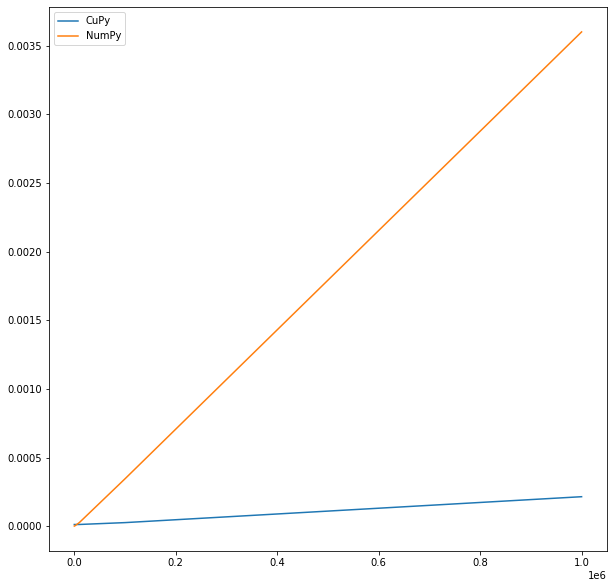

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plt.plot(array_sizes, cp_results, label = 'CuPy')
plt.plot(array_sizes, np_results, label = 'NumPy')
plt.legend()
plt.show()

## Task 11. CuPy-based Bifurcation map

By using <u><i><strong>CuPy</strong></i></u>, reimplement bifurcation map (Task 1).

In [8]:
import matplotlib.pyplot as plt

##11.1

In [9]:
# def bifurcation(r, x):
#     return r * x * (1 - x)

bifurcation=cp.ElementwiseKernel(
    'float32 r,float32 x','float32 z',
        '''z=r * x * (1 - x)''',
    'my_kernel')

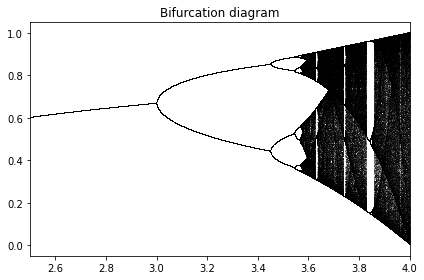

In [10]:
n = 10000
r = cp.linspace(2.5, 4.0, n,dtype='f')
iterations = 1000
last = 100
x = 1e-5 * cp.ones(n,dtype='f')

fig, (ax1) = plt.subplots(1, 1)
for i in range(iterations):
    x = bifurcation(r, x)
    if i >= (iterations - last):
        ax1.plot(r.get(), x.get(), ',k', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")

plt.tight_layout()

##11.2

In [11]:
!pip install line_profiler

In [12]:
# @cp.fuse()
def bifurcation_cp(r, x):
    return r * x * (1 - x)

In [13]:
%load_ext line_profiler
%lprun -f bifurcation_cp bifurcation_cp(r, x)

##11.3

In [14]:
def bifurcation_np(r, x):
    return r * x * (1 - x)

@cp.fuse()
def bifurcation_cp(r, x):
    return r * x * (1 - x)


# bifurcation_cp=cp.ElementwiseKernel(
#     'float32 r,float32 x','float32 z',
#         '''z=r * x * (1 - x)''',
#     'my_kernel')

In [15]:
import numpy as np
from time import time
cp_results = []
np_results = []
iterations = (100, 1000, 10000, 100000, 1000000)


n = 10000
last = 100

for max_iter in iterations:
    
    r_cp = cp.linspace(2.5, 4.0, n,dtype='f')
    x_cp = 1e-5 * cp.ones(n,dtype='f')

    r_np = np.linspace(2.5, 4.0, n,dtype='f')
    x_np = 1e-5 * np.ones(n,dtype='f')


    start_np_time = time()
    for i in range(max_iter):
        x_np = bifurcation_np(r_np, x_np)
    end_np_time = time()


    start_cp_time = time()
    for i in range(max_iter):
        x_cp = bifurcation_cp(r_cp, x_cp)
    end_cp_time = time()

    np_results.append(end_np_time - start_np_time)
    
    cp_results.append(end_cp_time - start_cp_time)



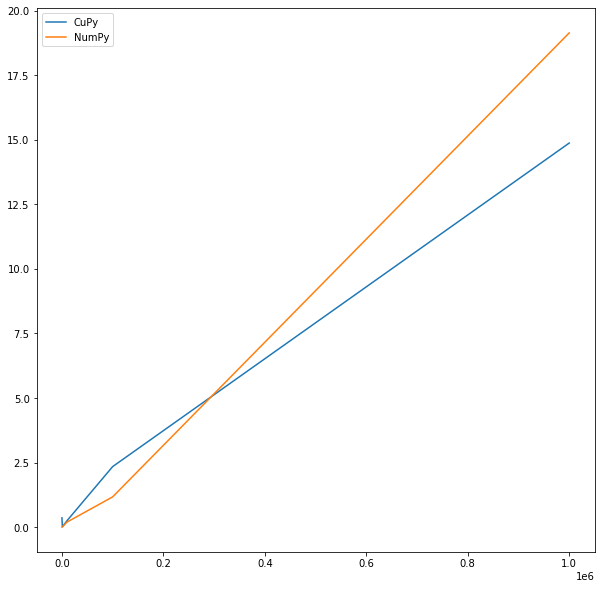

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plt.plot(array_sizes, cp_results, label = 'CuPy')
plt.plot(array_sizes, np_results, label = 'NumPy')
plt.legend()
plt.show()

## Task 12. Histogram


<u>By using <i><strong>CuPy</strong></i>:</u>
* Implement the suggested function:
$$
 f(x) = (z^2(x) + z^3(x) - 200 \,\, z^4(x) )\,\,\sin(\,\,100000\,\,(x + 0.5)\,\,),
 \\
 \text{where    }\:\:\: z(x) = \sin(3\,\,x)-0.5
$$
* Plot function on the $x$ interval $[0,\,\, 1]$. Number of points = 10000000.
* Get minimal and maximal values of function on the interval $[0,\,\, 1]$: $f_{min}$ and $f_{max}$.
* Divide $y=f(x), \: (x \in [0,\,\, 1]) \:$ interval $[f_{min}, f_{max}]$ into $10$ $y=f(x)$ subintervals of length $\delta$ equal to $0.1 \,\, (f_{max}-f_{min})$: $[f_{min},\,\, f_{min} + \delta],\,\, [f_{min}+ \delta,\,\, f_{min} + 2 \,\, \delta],\,\, \dots,\,\, [f_{max}- \delta,\,\, f_{max}]$.
* Compute number of $y=f(x), \: (x \in [0,\,\, 1]) \:$ values in each subinterval. Use $\operatorname{cp.sum(\dots)}$
* Plot histogram. <strong>[Hint: how to represent the histogram](https://cdn.datamentor.io/wp-content/uploads/2017/11/r-histogram.png)</strong>

<strong >Hint about function $f(x)$ appearance:</strong>
    ![Hint](Hint.png)

##12.1

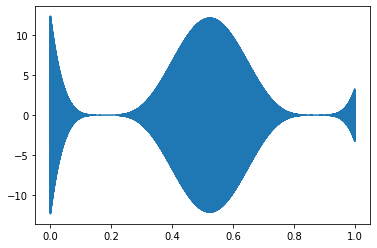

In [18]:
@cp.fuse()
def f(x):
    z = cp.sin(3 * x) - 0.5
    return (z * z + z * z * z - 200 * z * z * z * z) * cp.sin(100000 * (x + 0.5))
x = cp.linspace(0, 1, 10000000)
y = f(x)
plt.plot(x.get(), y.get())
plt.show()

##12.2

In [19]:
f_max = cp.max(y)
f_min = cp.min(y)
bins = cp.linspace(f_min, f_max, 11)
hist, bin_edges = cp.histogram(y, bins=bins)

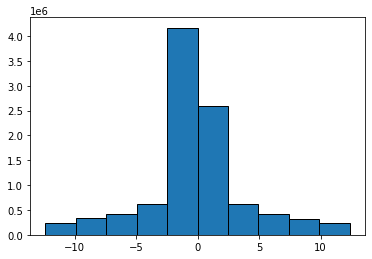

In [20]:
plt.bar(bin_edges[:-1].get(), hist.get(), width=cp.diff(bin_edges).get(), edgecolor="black", align="edge")
plt.show()

##12.3
I didn't get why and how we should use `cp.sum` so I did it with `cp.histogram`

In [21]:
f_max = cp.max(y)
f_min = cp.min(y)
bins = cp.linspace(f_min, f_max, 11)


In [22]:
%timeit -oq cp.histogram(y, bins=bins)

<TimeitResult : 100 loops, best of 5: 12.2 ms per loop>

In [23]:
%timeit -oq np.histogram(y.get(), bins=bins.get())


<TimeitResult : 1 loop, best of 5: 581 ms per loop>

## Task 13. Image blur


<u>By using <i><strong>CuPy</strong></i>:</u>
* Implement the gpu version of the image blur algorithm. What you need to do is calculate convolution some image and some blur filter on every pixel. You should compute convolutions in parallel for every pixel using gpu cores.
* Take any 100x100 image and 

<strong >Example of a blurred image:</strong>
    ![Blur](blur.jpg)

##12.1

In [24]:

from numpy.fft import fft2, ifft2
import numpy as np
import cupyx.scipy.signal
# @cp.fuse()
def conv2d(a, f, s):
    strd = cp.lib.stride_tricks.as_strided
    subM = strd(a, shape = s, strides = a.strides * 2)
    return cp.einsum('ij,ijkl->kl', f, subM)



In [25]:
import cv2
img = cv2.imread('shrek.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.ones((5,5), np.float32)/25
s = kernel.shape + tuple(np.subtract(img.shape, kernel.shape) + 1)

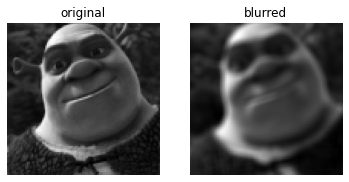

In [26]:
kernel = np.ones((5,5), np.float32)/25
s = kernel.shape + tuple(np.subtract(img.shape, kernel.shape) + 1)
enw = conv2d(cp.asarray(img),cp.asarray(kernel), s)
fig, ax = plt.subplots(ncols = 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].axis('off')
ax[1].imshow(enw.get(), cmap='gray')
ax[1].set_title('blurred')
ax[1].axis('off')
plt.show()

##13.2

In [27]:
%%timeit 
# our time
enw = conv2d(cp.asarray(img),cp.asarray(kernel), s)

1000 loops, best of 5: 620 µs per loop


##13.3

In [28]:
def conv2d_np(a, f, s):
    strd = np.lib.stride_tricks.as_strided
    subM = strd(a, shape = s, strides = a.strides * 2)
    return np.einsum('ij,ijkl->kl', f, subM)

%timeit enw = conv2d_np(img, kernel, s)

1000 loops, best of 5: 984 µs per loop
